# Title

* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [21]:
!date
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['hatch.color']='g'
import xarray as xr
import pandas as pd

import geoxarray
from geoplots import mapplot

Mon Jun 25 11:28:37 EDT 2018


In [31]:
tss = dict()

In [39]:
ncfiles = [f'/tigress/wenchang/MODEL_OUT/PIctl_CMIP6volc/POSTP/00{year}0101.atmos_month.nc'
           for year in range(51,81)]
data_name = 'swdn_toa_clr'
with xr.set_options(enable_cftimeindex=True):
    da = xr.open_mfdataset(ncfiles)[data_name].rename({'grid_xt':'lon', 'grid_yt':'lat'})

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)


In [77]:
# global mean
ts = da.geo.fldmean().load()
tss['global'] = ts

<IPython.core.display.Javascript object>


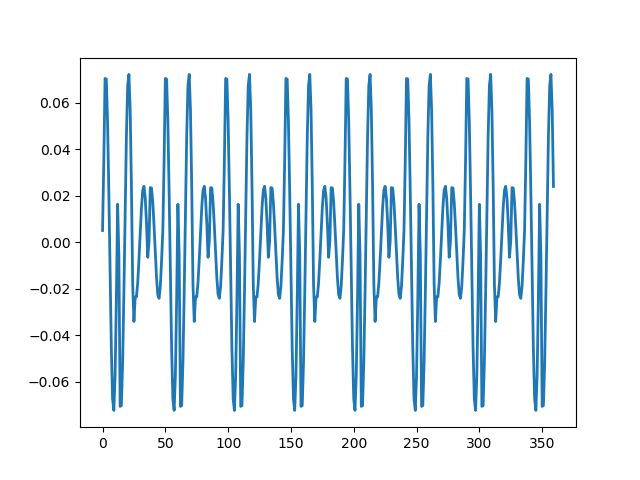

In [78]:
tsa = ts.groupby('time.month') - ts.groupby('time.month').mean()
plot(tsa)

<IPython.core.display.Javascript object>


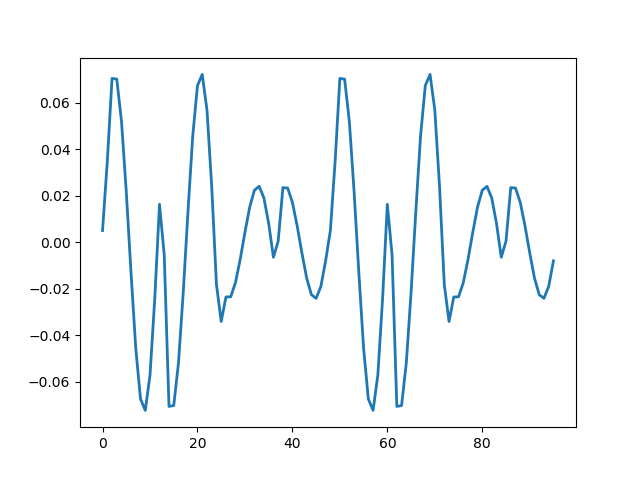

In [83]:
plot(tsa.isel(time=slice(0,96)))

In [84]:
# NH mean
ts = da.sel(lat=slice(0,90)).geo.fldmean().load()
tss['NH'] = ts

<IPython.core.display.Javascript object>


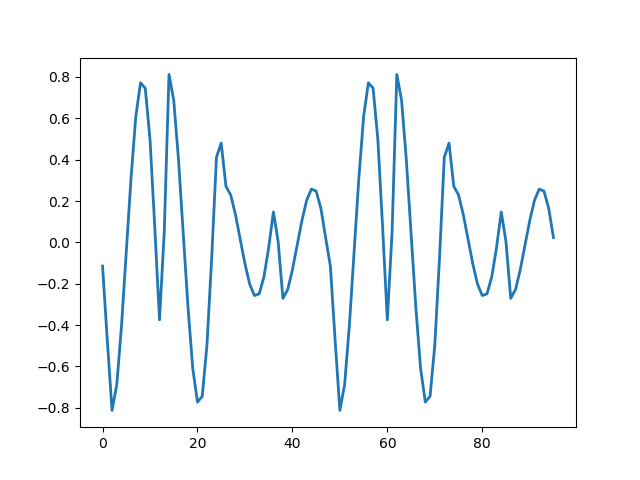

In [85]:
tsa = ts.groupby('time.month') - ts.groupby('time.month').mean()
plot(tsa.isel(time=slice(0,96)))

In [86]:
# SH mean
ts = da.sel(lat=slice(-90,0)).geo.fldmean().load()
tss['SH'] = ts

<IPython.core.display.Javascript object>


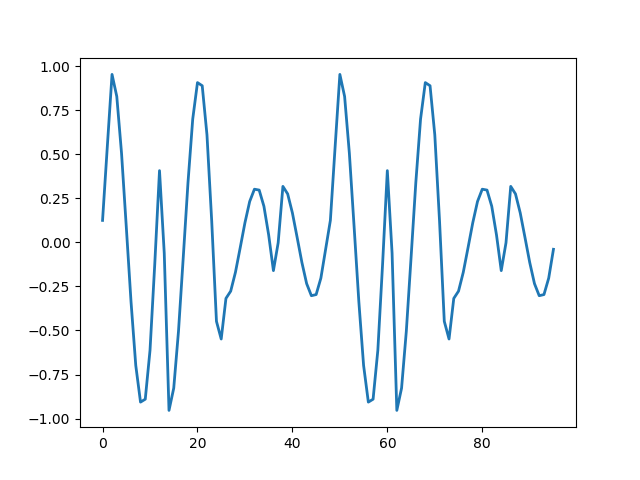

In [87]:
tsa = ts.groupby('time.month') - ts.groupby('time.month').mean()
plot(tsa.isel(time=slice(0,96)))